**Installing packages**

In [ ]:
pip install np_utils

     |████████████████████████████████| 61kB 4.2MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-cp37-none-any.whl size=57133 sha256=fec44c94fa05e703f2cd1ea1098c6946c90a63d8ab04140692fe8d2f2f5bf854
  Stored in directory: /root/.cache/pip/wheels/92/4b/81/206efd0d01330a96f3aebe5021d2d5f0b264b7ade827c306ef
Successfully built np-utils


**Importing required libraries**

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Preprocessing**

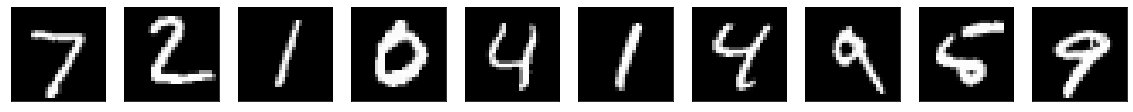

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

**Separating into training and testing data**

In [ ]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


**Defining Parameters**

In [ ]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

**Building the model**

In [ ]:
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


**Training**

In [ ]:
# Fitting on Data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=2)

Epoch 1/10
300/300 - 17s - loss: 1.4985 - accuracy: 0.5927
Epoch 2/10
300/300 - 2s - loss: 0.6809 - accuracy: 0.8328
Epoch 3/10
300/300 - 2s - loss: 0.4791 - accuracy: 0.8745
Epoch 4/10
300/300 - 2s - loss: 0.4021 - accuracy: 0.8906
Epoch 5/10
300/300 - 2s - loss: 0.3611 - accuracy: 0.9001
Epoch 6/10
300/300 - 2s - loss: 0.3341 - accuracy: 0.9058
Epoch 7/10
300/300 - 2s - loss: 0.3142 - accuracy: 0.9109
Epoch 8/10
300/300 - 2s - loss: 0.2982 - accuracy: 0.9146
Epoch 9/10
300/300 - 2s - loss: 0.2847 - accuracy: 0.9194
Epoch 10/10
300/300 - 2s - loss: 0.2733 - accuracy: 0.9224


**Testing**

313/313 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9260

Test accuracy: 0.9259999990463257


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 6 9 0 1 5 9 7 3 4]


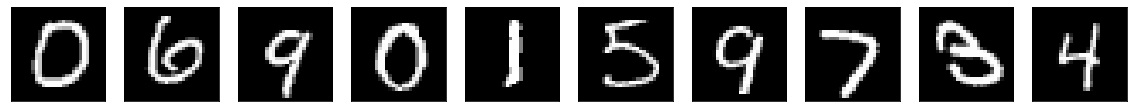

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

The model predicted the digits with the test accuracy of 92.6%